Name:Riya Shah    
Roll No.: D085  
SAP ID: 60009230017  
Branch: CSE DS-2-1

Aim: Implement Linear Regression on the given Dataset and apply Regularization to overcome overfitting
in the model.

#Dataset 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
angles = np.linspace(60, 300, 100)
radians = np.radians(angles)
sine_values = np.sin(radians) + np.random.normal(0, 0.1, size=radians.shape)

X = radians.reshape(-1, 1)
X = np.hstack((np.ones_like(X), X))
y = sine_values.reshape(-1, 1)

theta = np.random.randn(2, 1)
alpha = 0.01
epochs = 1000
m = len(y)

#Compute Cost

In [ ]:
def mean_squre_error(X,y,theta):
  if X.ndim == 1:
    X = X.reshape(-1, 1)
  if theta.shape[0] == 2 and X.shape[1] == 1:
    X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
  m=len(y)
  pred=X.dot(theta)
  cost=1/(2*m)*np.sum((pred-y)**2)
  return cost

In [ ]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

#Gradient descent


In [ ]:
cost_history = []
def gradient_descent(X, y, theta, alpha, epochs):
    global cost_history
    for _ in range(epochs):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta

#Train the model and plot results

In [ ]:
theta_optimized = gradient_descent(X, y, theta, alpha, epochs)

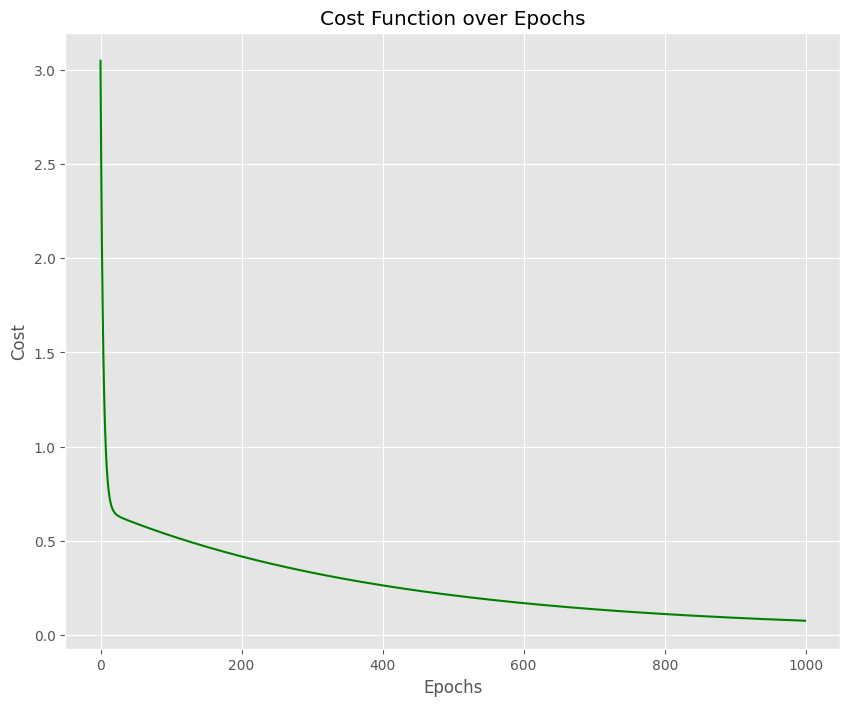

In [ ]:
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Function over Epochs")
plt.show()


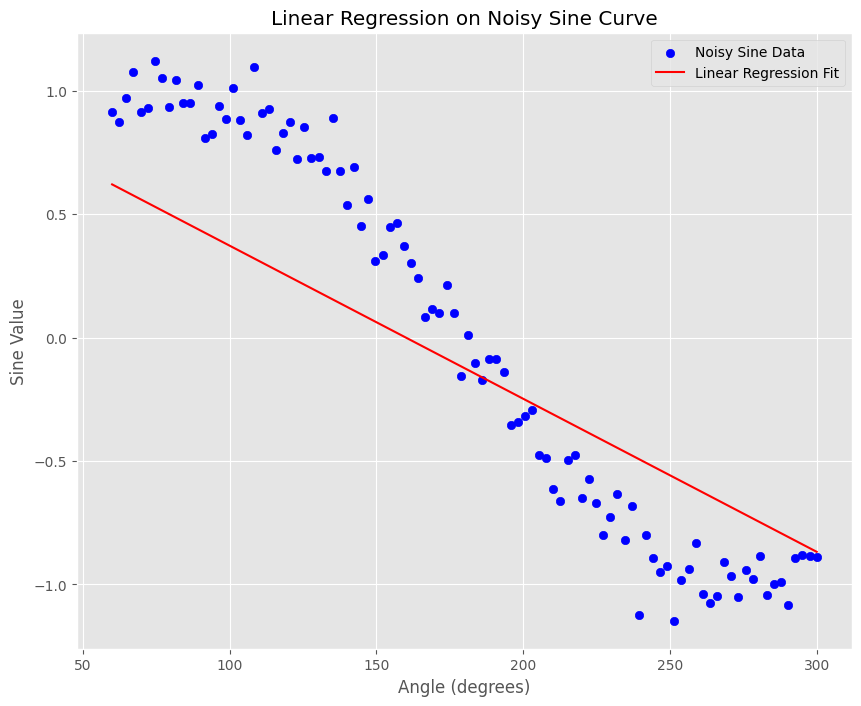

In [ ]:
plt.scatter(angles, y, label='Noisy Sine Data', color='blue')
plt.plot(angles, X.dot(theta_optimized), label='Linear Regression Fit', color='red')
plt.xlabel("Angle (degrees)")
plt.ylabel("Sine Value")
plt.legend()
plt.title("Linear Regression on Noisy Sine Curve")
plt.show()

#Dataset 2

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize']=(10,8)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/SEM 4/ML /Food_Truck_Data.csv")

In [ ]:
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


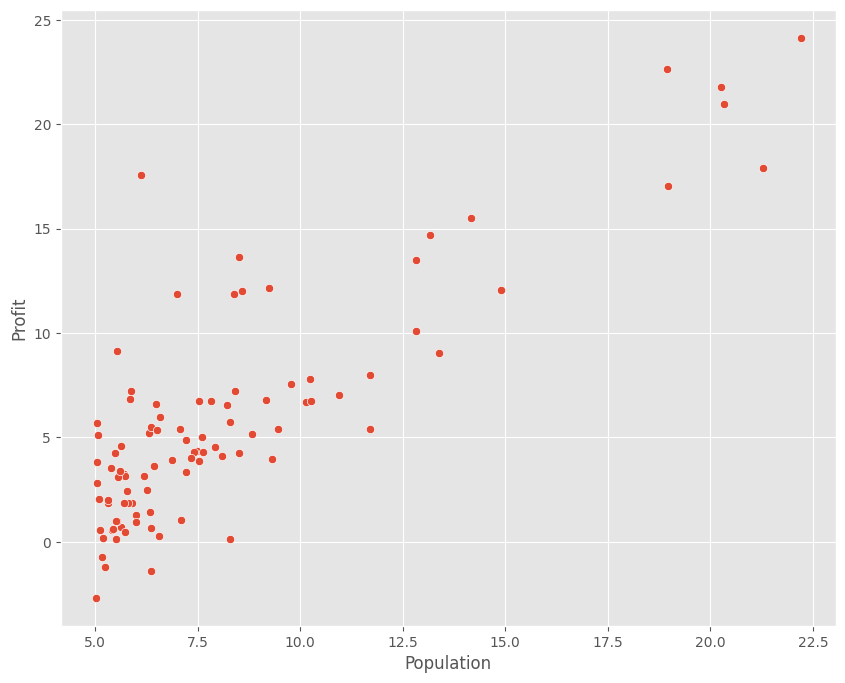

In [ ]:
ax=sns.scatterplot(data=data,x="Population",y="Profit")

#Cost Function


In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2
  cost = (1 / (2 * m)) * np.sum(error)
  return cost

In [ ]:
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

#Gradient Descent

In [ ]:
def gradient_descent2(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta = theta - ((alpha / m) * error)
    costs.append(cost_function(X, y, theta))
  return theta, costs

In [ ]:
theta, costs = gradient_descent2(X, y, theta, alpha = 0.01, iterations = 10)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = 0.01 + 0.8x1


#Plotting cost function

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i,j] = cost_function(X,y,t)

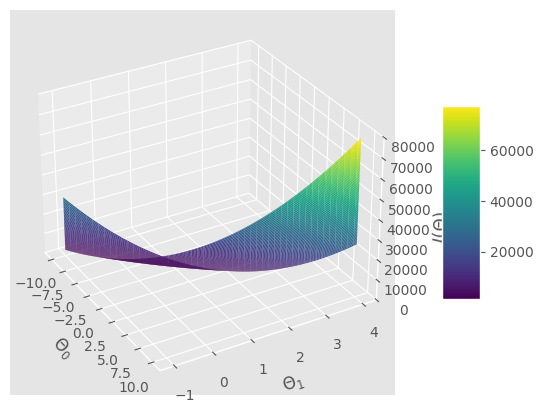

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')  # Use Axes3D

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap="viridis")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\\Theta_0$")
plt.ylabel("$\\Theta_1$")
ax.set_zlabel("$J(\\Theta)$")

ax.view_init(30, 330)

plt.show()

Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

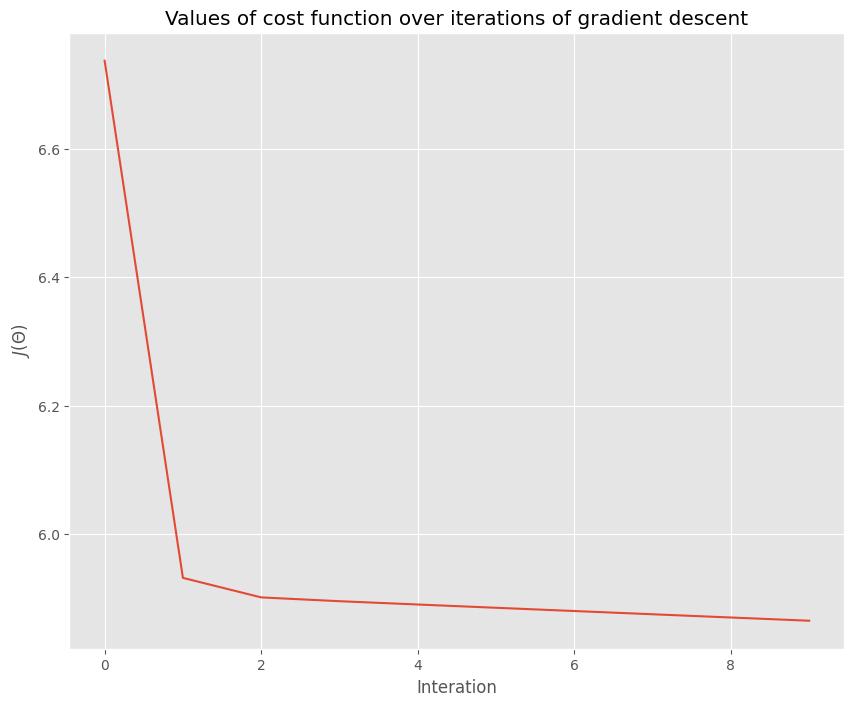

In [ ]:
plt.plot(costs)
plt.xlabel("Interation")
plt.ylabel("$J(\Theta)$")
plt.title("Values of cost function over iterations of gradient descent")

#Linear Regression on Dataset2


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.nunique()

,0
Population,97
Profit,97


In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Profit',axis=1)
y=data['Profit']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

-3.8962847636443882


In [ ]:
lm.score(X_test,y_test)

0.6550860246011561

In [ ]:
lm.score(X_train,y_train)

0.7103039544174121

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test,y_test)

0.6546032317752987

In [ ]:
ridge_reg.score(X_train,y_train)

0.7091824579332997

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

-0.019905832001538615

In [ ]:
lasso_reg.score(X_train,y_train)

0.0

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=lm.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

8.224629535888901


In [ ]:
y_pred=ridge_reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

8.236141948891799


In [ ]:
y_pred=lasso_reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

24.320115240344403


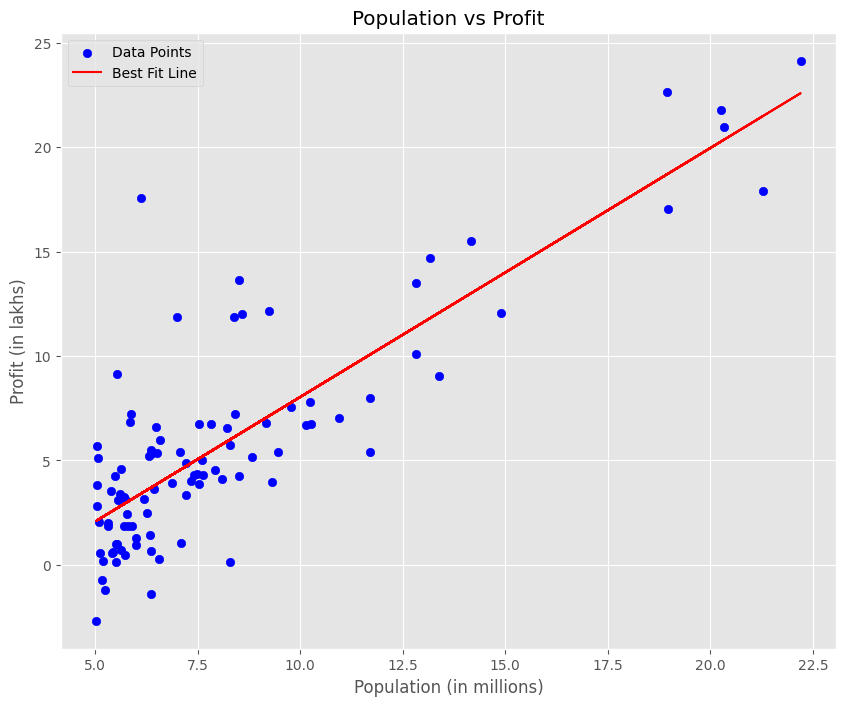

In [ ]:
plt.scatter(data.Population, data.Profit, color='blue', label='Data Points')
m, b = np.polyfit(data.Population, data.Profit, 1)
plt.plot(data.Population, m * data.Population + b, color='red', label='Best Fit Line')
plt.xlabel('Population (in millions)')
plt.ylabel('Profit (in lakhs)')
plt.title('Population vs Profit')
plt.legend()
plt.show()

#Home dataset done in lab

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/SEM 4/ML /home_data.csv")

In [ ]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dataset.nunique()

,0
id,21436
date,372
price,4032
bedrooms,13
bathrooms,30
sqft_living,1038
sqft_lot,9782
floors,6
waterfront,2
view,5


In [ ]:
dataset.shape

(21613, 21)

In [ ]:
dataset.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
col_tube_used=["price","bedrooms","sqft_living","condition","floors","waterfront","view"]
dataset1=dataset[col_tube_used]
dataset1.head(5)

,price,bedrooms,sqft_living,condition,floors,waterfront,view
0,221900,3,1180,3,1.0,0,0
1,538000,3,2570,3,2.0,0,0
2,180000,2,770,3,1.0,0,0
3,604000,4,1960,5,1.0,0,0
4,510000,3,1680,3,1.0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x=dataset1.drop("price",axis=1)
y=dataset1["price"]

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
reg=LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [ ]:
reg.score(test_x,test_y)

0.5789150391096656

In [ ]:
reg.score(train_x,train_y)

0.5593426689607031

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(train_x,train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(test_x,test_y)

0.5787559496439263

**Ridge regression**

In [ ]:
Ridge_reg=linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
Ridge_reg.fit(train_x,train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
Ridge_reg.score(test_x,test_y)

0.5742470538402134

In [ ]:
Ridge_reg.score(train_x, train_y)

0.5580278898472233

----------------------